# Imports and data inits

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/All New Signals.csv")
# df
# print(df['weather'].value_counts())
# df['Ridership'].mean()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.dropna()


# One hot encode the categorical values

In [2]:
df2 = pd.get_dummies(df, prefix=['weather'], columns=['weather'])
df2
df2.columns

Index(['Ridership', 'day temp', 'night temp', 'barclays-center_event_occurred',
       'beacon-theatre_event_occurred', 'blue-note-jazz-club_event_occurred',
       'brooklyn-bowl_event_occurred', 'carnegie-hall_event_occurred',
       'city-winery-the-loft_event_occurred', 'total_comedy', 'total_events',
       'total_film-screenings', 'forest-hills-stadium_event_occurred',
       'irving-plaza_event_occurred', 'kings-theatre_event_occurred',
       'lincoln-center_event_occurred', 'madison-square-garden_event_occurred',
       'mercury-lounge_event_occurred', 'metlife-stadium_event_occurred',
       'total_music', 'palladium-times-square_event_occurred',
       'radio-city-music-hall_event_occurred', 'sony-hall_event_occurred',
       'terminal-5_event_occurred', 'the-bowery-ballroom_event_occurred',
       'the-town-hall_event_occurred', 'yankee-stadium_event_occurred',
       'weather_Broken clouds', 'weather_Clear sky',
       'weather_Cloudy and light snow', 'weather_Drizzle',
  

# Add past 14 days worth of data to df3

In [3]:
df3 = df2.copy()
df3['ridership_shift_1_days'] = df3['Ridership'].shift(1)
df3['ridership_shift_2_days'] = df3['Ridership'].shift(2)
df3['ridership_shift_3_days'] = df3['Ridership'].shift(3)
df3['ridership_shift_4_days'] = df3['Ridership'].shift(4)
df3['ridership_shift_5_days'] = df3['Ridership'].shift(5)
df3['ridership_shift_6_days'] = df3['Ridership'].shift(6)
df3['ridership_shift_7_days'] = df3['Ridership'].shift(7)
df3['ridership_shift_8_days'] = df3['Ridership'].shift(8)
df3['ridership_shift_9_days'] = df3['Ridership'].shift(9)
df3['ridership_shift_10_days'] = df3['Ridership'].shift(10)
df3['ridership_shift_11_days'] = df3['Ridership'].shift(11)
df3['ridership_shift_12_days'] = df3['Ridership'].shift(12)
df3['ridership_shift_13_days'] = df3['Ridership'].shift(13)
df3['ridership_shift_14_days'] = df3['Ridership'].shift(14)
df3[['Ridership','ridership_shift_1_days','ridership_shift_14_days']].head(16)

,Ridership,ridership_shift_1_days,ridership_shift_14_days
date,,,
2020-03-01,2212965.0,NaN,NaN
2020-03-02,5329915.0,2212965.0,NaN
2020-03-03,5481103.0,5329915.0,NaN
2020-03-04,5498809.0,5481103.0,NaN
2020-03-05,5496453.0,5498809.0,NaN
2020-03-06,5189447.0,5496453.0,NaN
2020-03-07,2814637.0,5189447.0,NaN
2020-03-08,2120656.0,2814637.0,NaN
2020-03-09,4973513.0,2120656.0,NaN


# ==================================================
# Data prep complete, nothing needs to be done above
# ==================================================

# Run and Test Data

In [4]:
# Setting up past and future data
mock_modeling_data_df = df3.loc['2020-03-15':'2023-02-16']

forecast_verification_df = df3.loc['2023-02-16':'2023-03-02']
forecast_verification_df

,Ridership,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,total_comedy,...,ridership_shift_5_days,ridership_shift_6_days,ridership_shift_7_days,ridership_shift_8_days,ridership_shift_9_days,ridership_shift_10_days,ridership_shift_11_days,ridership_shift_12_days,ridership_shift_13_days,ridership_shift_14_days
date,,,,,,,,,,,,,,,,,,,,,
2023-02-16,3683782.0,64.0,59.0,0,0,1,1,0,1,37,...,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0,1742435.0,3189550.0,3699932.0
2023-02-17,3253165.0,59.0,59.0,1,1,1,1,0,1,26,...,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0,1742435.0,3189550.0
2023-02-18,2271106.0,41.0,32.0,1,1,1,1,0,1,42,...,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0,1742435.0
2023-02-19,1824136.0,48.0,39.0,1,1,1,1,0,1,25,...,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0,1625375.0
2023-02-20,2238528.0,55.0,48.0,0,0,1,1,1,1,17,...,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0,3372445.0
2023-02-21,3325483.0,45.0,50.0,0,0,1,0,0,1,25,...,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0,3738539.0
2023-02-22,3454275.0,43.0,41.0,0,0,1,0,0,1,24,...,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0,3780682.0
2023-02-23,3498242.0,43.0,41.0,0,1,1,0,0,0,31,...,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0,3754859.0
2023-02-24,3244250.0,39.0,43.0,1,1,1,1,0,1,42,...,1824136.0,2271106.0,3253165.0,3683782.0,3762817.0,3812943.0,3303337.0,1746099.0,2333625.0,3539529.0


In [5]:
# Encode the label using LabelEncoder
X = mock_modeling_data_df.loc[:, 'day temp':]
# X = mock_modeling_data_df.loc[:, 'Ridership':'weather_Thunderstorm with rain']
y = mock_modeling_data_df.loc[:, 'Ridership']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [6]:
# Scaling data with StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()

# Fitting standard scaler on X_train and y_train using transform
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Fitting standard scaler on X_test and y_test using transform
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Random Forest Report

In [7]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth = 10) #mse default criterion
# max_features number taken from square rooting total number of features

rf = forest.fit(X_train,y_train)
rf.score(X_test, y_test)
print(f'rf.score = {rf.score(X_train,y_train)}')
print('---------------')
print(f'rf.feature_importances_ = \n{(rf.feature_importances_)}')
print('---------------')
dtf = rf.feature_importances_
dt = pd.DataFrame(index = X.columns)
dt['Features Importance'] = dtf
dt = dt.sort_values('Features Importance', ascending = False)
print(f'dt(feature_importances_) = \n{dt}')
print('---------------')
print("Model Accuracy: %.3f" % rf.score(X_test, y_test))
print('---------------')
#
# Create the mean squared error
#
mserf = mean_squared_error(y_test, rf.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mserf))

rf.score = 0.9860891327997767
---------------
rf.feature_importances_ = 
[2.12662062e-03 1.47942646e-03 1.31556071e-04 2.53404231e-04
 3.76433948e-05 2.87006918e-04 2.65304871e-04 7.53282558e-04
 3.59464298e-03 6.30314851e-03 1.56065422e-03 8.20859654e-05
 2.28433906e-04 1.83198948e-04 2.41353205e-05 3.78002639e-04
 5.46257246e-04 3.25230974e-04 3.53652341e-03 2.18796790e-04
 1.93791774e-04 2.01345760e-04 1.46912111e-04 2.24694347e-04
 1.05548529e-04 2.21754497e-04 2.22359250e-04 1.49623438e-04
 5.37339598e-06 1.44671244e-04 8.46450118e-05 4.69129855e-04
 1.48009756e-05 4.18980924e-05 2.04966925e-03 1.48005032e-04
 2.63718117e-05 9.72733965e-05 1.35506253e-04 0.00000000e+00
 4.48134657e-05 1.42080906e-07 1.89168961e-05 5.35579147e-05
 4.83003630e-06 5.00436203e-05 3.67069984e-02 1.54911731e-03
 2.69655235e-03 2.00932379e-03 4.05270442e-03 7.08516078e-03
 7.74235454e-01 3.29993855e-03 5.03898796e-03 9.23488078e-03
 3.66981712e-03 5.39374750e-03 4.44807379e-03 1.13408209e-01]
-----------

# =======================
# Create Forecasting Data
## Code here onwards will be standalone and it will recursively forecast the next 14 days' ridership
## Data retrieved comes from df3
# =======================

In [8]:
# init
all_data_df = df3.copy()

## Helper Functions

In [9]:
def update_shifted_ridership_data():
  """
  Updates "ridership_shift_#_days" values based on shifted "Ridership" data
  """
  all_data_df['ridership_shift_1_days'] = all_data_df['Ridership'].shift(1)
  all_data_df['ridership_shift_2_days'] = all_data_df['Ridership'].shift(2)
  all_data_df['ridership_shift_3_days'] = all_data_df['Ridership'].shift(3)
  all_data_df['ridership_shift_4_days'] = all_data_df['Ridership'].shift(4)
  all_data_df['ridership_shift_5_days'] = all_data_df['Ridership'].shift(5)
  all_data_df['ridership_shift_6_days'] = all_data_df['Ridership'].shift(6)
  all_data_df['ridership_shift_7_days'] = all_data_df['Ridership'].shift(7)
  all_data_df['ridership_shift_8_days'] = all_data_df['Ridership'].shift(8)
  all_data_df['ridership_shift_9_days'] = all_data_df['Ridership'].shift(9)
  all_data_df['ridership_shift_10_days'] = all_data_df['Ridership'].shift(10)
  all_data_df['ridership_shift_11_days'] = all_data_df['Ridership'].shift(11)
  all_data_df['ridership_shift_12_days'] = all_data_df['Ridership'].shift(12)
  all_data_df['ridership_shift_13_days'] = all_data_df['Ridership'].shift(13)
  all_data_df['ridership_shift_14_days'] = all_data_df['Ridership'].shift(14)

In [10]:
# import datetime
from datetime import datetime, timedelta

def generate_modeling_and_forecasting_df(modeling_date_from, forecast_date_from):
  """
  Setting up past and future data from all_data_df
  """

  # # The following code logic is repeated
  # modeling_data_df = all_data_df.loc['2020-03-15':'2023-02-16']
  # forecasting_df = all_data_df.loc['2023-02-16'] # from date range '2023-02-16':'2023-03-02'

  modeling_data_df = all_data_df.loc[modeling_date_from : (forecast_date_from - timedelta(days=1))] # modeling_date_to is one day before forecast_date_from
  forecasting_df = all_data_df.loc[forecast_date_from]

  return modeling_data_df, forecasting_df

In [11]:
def parse_train_test_split(X, y):
  """
  Returns the train and test variables "X_train, X_test, y_train, y_test"
  In serialized (non random) split models this function needs update
  """
  # # Set the train and test variables. While seeming redundant, this step exists
  # # to account for manual train and test split for squential modeling
  return train_test_split(X, y, random_state=42, test_size = 0.2)

## Run Code

In [12]:
# Init

model_generation_from_date = datetime.strptime('2020-03-15', '%Y-%m-%d')
model_generation_to_date = None # datetime.strptime('2023-02-17', '%Y-%m-%d')

forecast_generation_from_date = '2023-02-17'
forecast_generation_to_date = '2023-03-02'

verification_data_series = all_data_df['Ridership'].copy()
all_data_df.loc[forecast_generation_from_date:, "Ridership"] = 0

# Setting forecast data. Past data will be processed in each loop
forecast_iteration_df = all_data_df.loc[forecast_generation_from_date:forecast_generation_to_date]

# pd.DataFrame([all_data_df['Ridership'].tail(20), verification_data_series.tail(20)]).transpose()

In [13]:
# dt2

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
# For each row in forecast_verification_df, recursive analysis should rebuild training and testing data
## this implies there will be a new 80/20 split for each new model
## folding would help ensure consistency between each iterations

# The for loop will iterate through the dates from 2023-02-17 to 2023-03-02
# Total of 14 iterations should run, each building a new modeling_df that will
# Iteratively add one more date before generating a new model
dt2 = pd.DataFrame()
for index, row in forecast_iteration_df.iterrows():

  update_shifted_ridership_data()  

  forecast_generation_to_date = index

  # The following retrieves data from all_data_df - all_data_df will be updated at the bottom of the for loop
  modeling_df, forecasting_df = generate_modeling_and_forecasting_df(model_generation_from_date, forecast_generation_to_date)

  # Set X to Independent Variables - This includes the 14 day shifted dates
  # Set y to Dependent Variable Ridership
  modeling_X = modeling_df.loc[:, 'day temp':]
  modeling_y = modeling_df.loc[:, 'Ridership']
  forecasting_X = pd.DataFrame(forecasting_df.loc['day temp':].to_frame()).transpose()
  # forecasting_X = forecasting_df.loc[:, 'day temp':]
  forecasting_y = 0 # Value to be predicted

  # Train test split is not needed because the entire dataset is technically training
  # X_train, X_test, y_train, y_test = parse_train_test_split(X, y)

  # Build a pipeline that processes StandardScaler and Random Forest Regressor
  pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(n_estimators=100, max_depth=7, learning_rate=.001, validation_fraction = 0.3, alpha = 0.5)
  )

  pipeline.fit(modeling_X, modeling_y)

  # dtf = rf.feature_importances_
  # dt = pd.DataFrame(index = X.columns)
  # dt['Features Importance'] = dtf
  # dt2 = dt

  # Make predictions on the test data
  forecasting_y = pipeline.predict(forecasting_X)[0] # y_pred[0]

  all_data_df.at[index,'Ridership'] = forecasting_y

In [16]:
pd.DataFrame([all_data_df['Ridership'].tail(20), verification_data_series.tail(20)]).transpose()

,Ridership,Ridership
date,,
2023-02-11,2.333625e+06,2333625.0
2023-02-12,1.746099e+06,1746099.0
2023-02-13,3.303337e+06,3303337.0
2023-02-14,3.812943e+06,3812943.0
2023-02-15,3.762817e+06,3762817.0
2023-02-16,3.683782e+06,3683782.0
2023-02-17,2.145238e+06,3253165.0
2023-02-18,2.087571e+06,2271106.0
2023-02-19,2.037533e+06,1824136.0


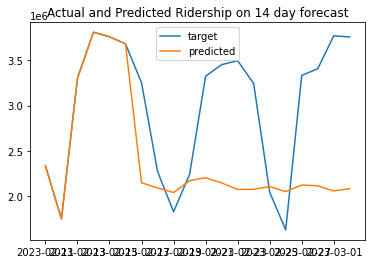

In [17]:
from matplotlib import pyplot as plt 

plt.plot(verification_data_series.tail(20), label='target')
plt.plot(all_data_df['Ridership'].tail(20), label='predicted')
plt.legend()
plt.title("Actual and Predicted Ridership on 14 day forecast")
plt.show()


     